In [2]:
# import os
from pandas import DataFrame, read_csv
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from math import log
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib
import random
%matplotlib inline

In [3]:
def cuadrt(x, a, b, c):
    return a * (x**2) + c
def lineal(x, a, b, c):
    return a * x + c
def logrtm(x, a, b, c):
    return a * np.log(x) + c

# Ejercicio 3 
## Tiempos

Muchísimos tests, con grafos completos de pesos random y con una cantidad random de caminos ya construidos.

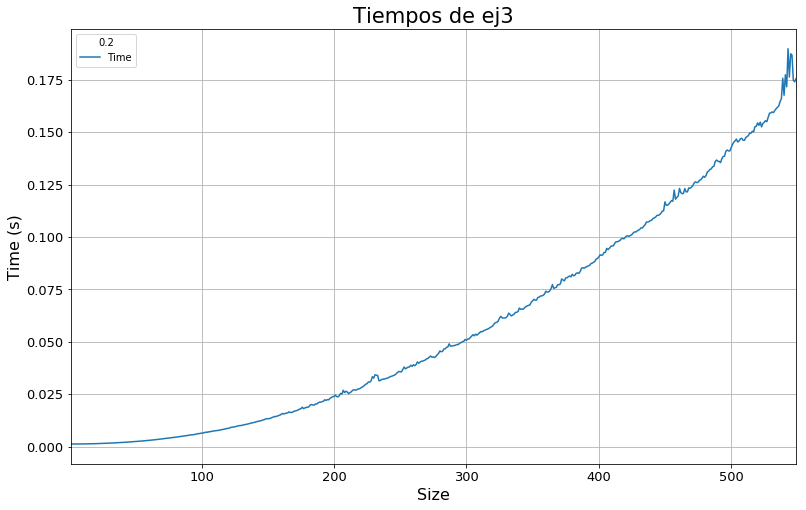

In [2]:
d3 = pd.read_csv("./timesEj3.csv")

sized3 = d3.groupby('Size')


dyn = sized3.quantile(0.2).plot.line(title="Tiempos de ejecución de Dinámica", fontsize=13, figsize=(13,8), logy=False, grid=True)
dyn.set_title("Tiempos de ej3", fontsize=21)
dyn.set_ylabel("Time (s)", fontsize=16)
dyn.set_xlabel("Size", fontsize=16)

/home/maipo/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


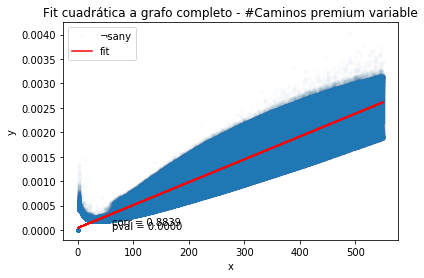

In [63]:
d1 = pd.read_csv("./data/timesEj3.csv")
d1.describe()

xdata = d1['Size']
d1['Time'] = d1['Time'] / d1['Size']**(1)*d1['Size'].apply(lambda x: log(x)  if x >= 0 else -1)
ydata = d1['Time']
plt.plot(xdata, ydata, '.', alpha=.01, label='¬sany')
popt, pcov = curve_fit(lineal, xdata, ydata)
yfit = lineal(xdata, *popt)
plt.plot(xdata, yfit, 'r-', label='fit')

corr, pval = pearsonr(yfit,ydata)

plt.title('Fit cuadrática a grafo completo - #Caminos premium variable')
plt.text(62.5, 0.0001, r'corr = %.4f'%corr)
plt.text(62, 0.00002, r'pval = %.4f'%pval)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Complejidad

### Lineal

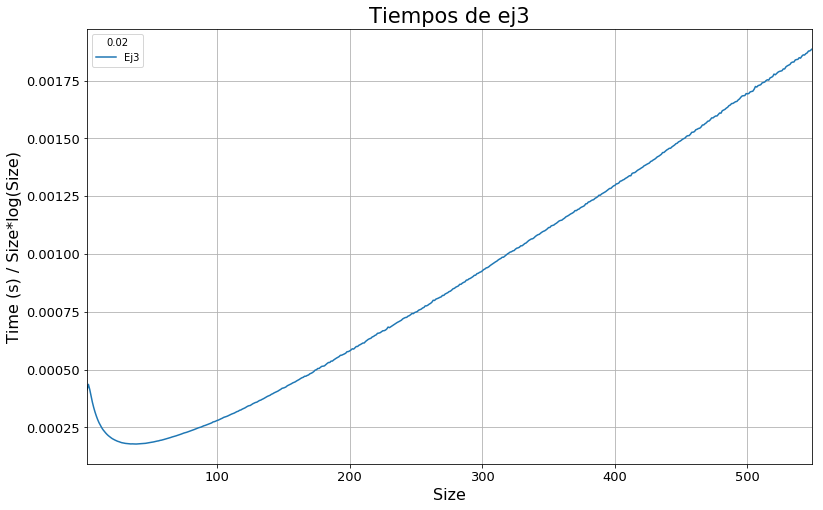

In [38]:
ddyna = pd.read_csv("./data/timesEj3.csv")
ddyna['Ej3'] = ddyna['Time'] / ddyna['Size']**(1)*ddyna['Size'].apply(lambda x: log(x)  if x >= 0 else -1)
del ddyna['Time']
sizedyna = ddyna.loc[ddyna['Size'] > 1].groupby('Size')
dyna = sizedyna.quantile(0.02).plot.line(fontsize=13, figsize=(13,8), grid=True)
dyna.set_title("Tiempos de ej3", fontsize=21)
dyna.set_ylabel("Time (s) / Size*log(Size)", fontsize=16)
dyna.set_xlabel("Size", fontsize=16)

### Constante

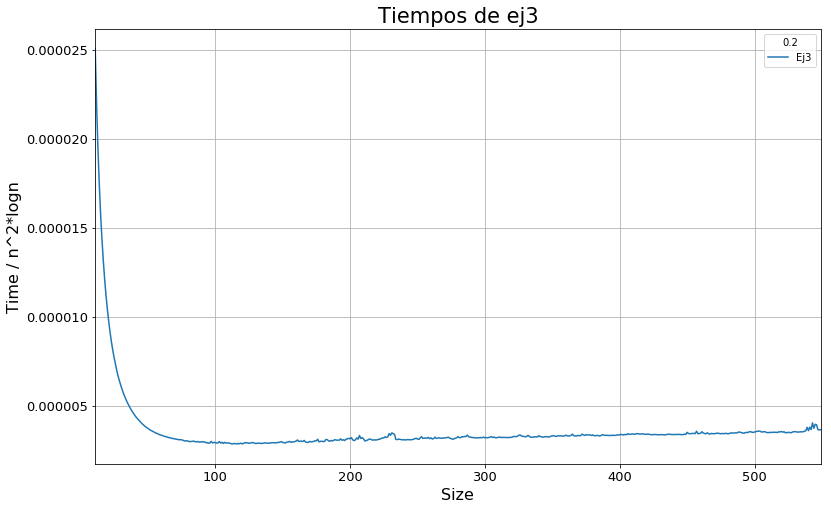

In [4]:
ddyna = pd.read_csv("./timesEj3.csv")
ddyna['Ej3'] = ddyna['Time'] / (ddyna['Size']**(2))*ddyna['Size'].apply(lambda x: log(x)  if x >= 0 else -1)
del ddyna['Time']
sizedyna = ddyna.loc[ddyna['Size'] > 10].groupby('Size')
dyna = sizedyna.quantile(0.2).plot.line(fontsize=13, figsize=(13,8), grid=True)
dyna.set_title("Tiempos de ej3", fontsize=21)
dyna.set_ylabel("Time / n^2*logn", fontsize=16)
dyna.set_xlabel("Size", fontsize=16)

# Ejercicio 2 
## Tiempos

### N y C fijos, M variable. 
#### Debería ser lineal O(M)

/home/maipo/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


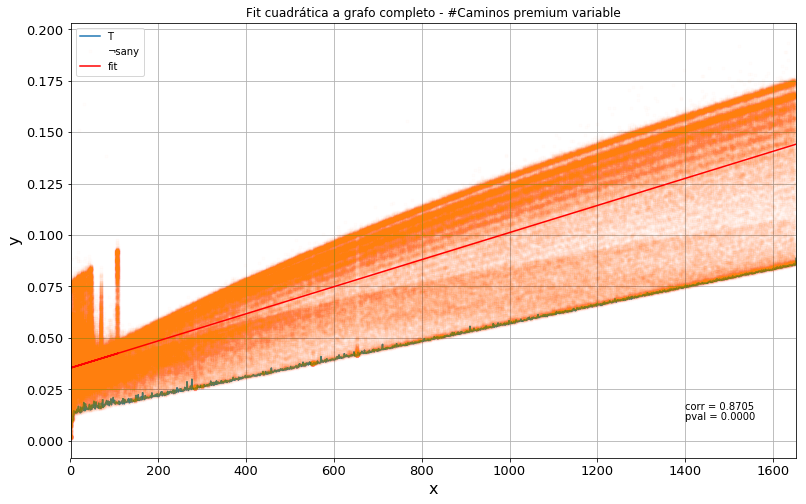

In [5]:
d2 = pd.read_csv("./data/timesEj2M.csv")
MvsT = d2.groupby('M')

dyn = MvsT.quantile(0.002).plot.line(fontsize=13, figsize=(13,8), logy=False, grid=True)
dyn.set_title("Tiempos de ej2 (n=250,c=30)", fontsize=21)
dyn.set_ylabel("Time (s)", fontsize=16)
dyn.set_xlabel("Cantidad de Ejes", fontsize=16)


xdata = d2['M']
ydata = d2['T']
plt.plot(xdata, ydata, '.', alpha=.01, label='¬sany')
popt, pcov = curve_fit(lineal, xdata, ydata)
yfit = lineal(xdata, *popt)
plt.plot(xdata, yfit, 'r-', label='fit')

corr, pval = pearsonr(yfit,ydata)

plt.title('Fit cuadrática a grafo completo - #Caminos premium variable')
plt.text(1400, 0.015, r'corr = %.4f'%corr)
plt.text(1400, 0.010, r'pval = %.4f'%pval)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### N variable, M==N y C fijo. 
#### Debería ser cuadrático O(M*N)

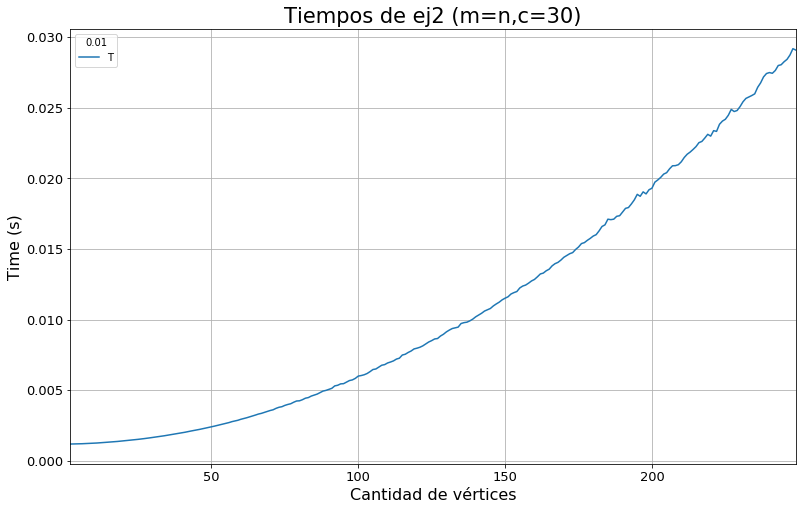

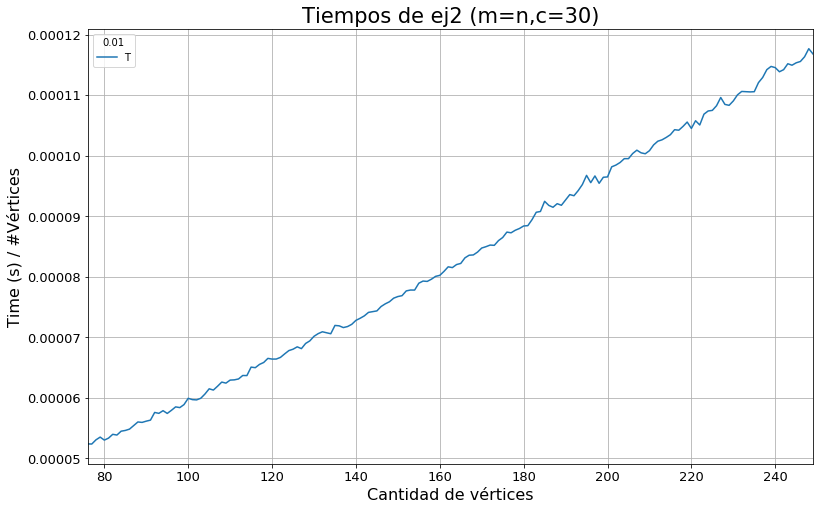

In [6]:
d2 = pd.read_csv("./timesEj2NM.csv")
NMvsT = d2.groupby('N')

dyn = NMvsT.quantile(0.01).plot.line(fontsize=13, figsize=(13,8), logy=False, grid=True)
dyn.set_title("Tiempos de ej2 (m=n,c=30)", fontsize=21)
dyn.set_ylabel("Time (s)", fontsize=16)
dyn.set_xlabel("Cantidad de vértices", fontsize=16)

ddyna = pd.read_csv("./timesEj2NM.csv")
ddyna['T'] = ddyna['T'] / ddyna['N']
sizedyna = ddyna.loc[ddyna['N'] > 75].groupby('N')
dyna = sizedyna.quantile(0.01).plot.line(fontsize=13, figsize=(13,8), grid=True)
dyna.set_title("Tiempos de ej2 (m=n,c=30)", fontsize=21)
dyna.set_ylabel("Time (s) / #Vértices", fontsize=16)
dyna.set_xlabel("Cantidad de vértices", fontsize=16)

### C variable, N fijo, M fijo. 
#### Debería ser logarítmico O(log C)

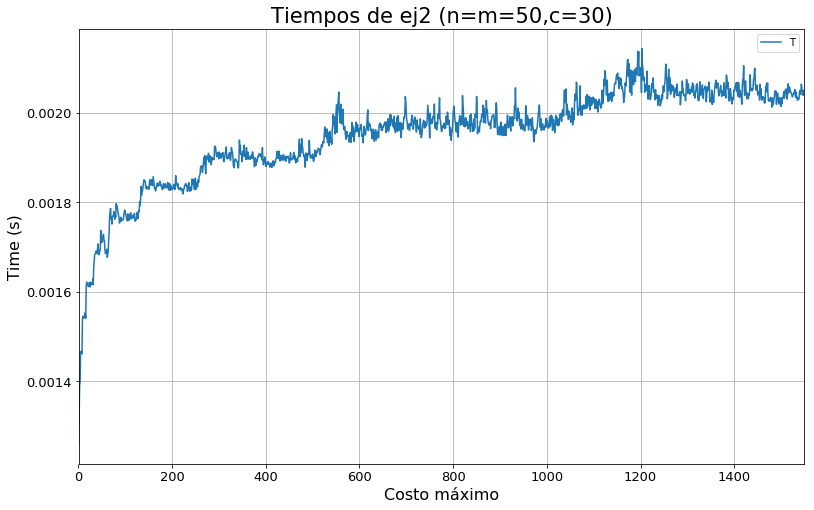

In [78]:
d2 = pd.read_csv("./data/timesEj2C.csv")
CvsT = d2.groupby('C')

dyn = CvsT.median().plot.line(fontsize=13, figsize=(13,8), logy=False, grid=True)
dyn.set_title("Tiempos de ej2 (n=m=50,c=30)", fontsize=21)
dyn.set_ylabel("Time (s)", fontsize=16)
dyn.set_xlabel("Costo máximo", fontsize=16)



/home/maipo/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


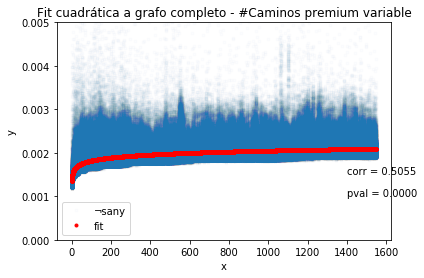

In [81]:
d2 = pd.read_csv("./data/timesEj2C.csv")
xdata = d2['C']
ydata = d2['T']
plt.plot(xdata, ydata, '.', alpha=.01, label='¬sany')
popt, pcov = curve_fit(logrtm, xdata, ydata)
yfit = logrtm(xdata, *popt)
plt.plot(xdata, yfit, 'r.', label='fit')

corr, pval = pearsonr(yfit,ydata)

plt.title('Fit cuadrática a grafo completo - #Caminos premium variable')
plt.text(1400, 0.0015, r'corr = %.4f'%corr)
plt.text(1400, 0.0010, r'pval = %.4f'%pval)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((0,0.005))
plt.legend()
plt.show()